<p> 
Instalar Bibliotecas: <b>request</b> e <b>BeautifulSoup</b>
</p>

<p>
<b>Request:</b> É uma requisição que o cliente (usuário) faz ao servidor e o servidor retorna as informações que o cliente solicitou atraves do response.
</p>

In [12]:
#!pip install requests ## já instalada nativamente no colab 
#!pip install beautifulSoup4 ## já instalada nativamente no colab

In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
#User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36',
}
# Request da url passada
page = requests.get(
    'https://www.google.com/search?q=pre%C3%A7o+dolar&oq=pre%C3%A7o+dola&aqs=chrome.1.69i57j0i433i512l2j0i512l7.8866j1j7&sourceid=chrome&ie=UTF-8',
    headers=headers
    )

In [15]:
# Imprimindo HTML da página
#print(page.content)

In [16]:
scraping = BeautifulSoup(page.content, 'html.parser')

### importante inspecionar o HTML da página para ver como está distribuido as informações que deseja coletar e quais as tags que elas estão.

In [17]:
atributos = {
    'class':'dDoNo ikb4Bb gsrt gzfeS',
}

In [18]:
# Pegando Div do HTML
response = scraping.find_all('div', attrs=atributos)

In [19]:
print(list(response))

[<div class="dDoNo ikb4Bb gsrt gzfeS"><span class="DFlfde SwHCTb" data-precision="2" data-value="0.84299">0.84</span> <span class="MWvIVe" data-mid="/m/02l6h" data-name="Euro">Euro</span></div>]


## Valor do dólar em real


In [20]:
atributos = {
    'class':'DFlfde SwHCTb',
}

dolar_real = scraping.find_all('span', attrs=atributos)[0]

In [21]:
print(dolar_real.text)

0.84


<p>
Por algum motivo o valor que está sendo retornado é o valor do Dólar para EURO, mesmo com a conversão do dólar para real... O processo se encontra correto, a váriavel dolar_real recebe o objeto scraping e o metodo find_all com os arguementos span, que é a tag HTML que está a informação do valor do real do dia  refente ao dólar e attrs que recebe a classe do span

</p>

#### Segue a imagem do HTML

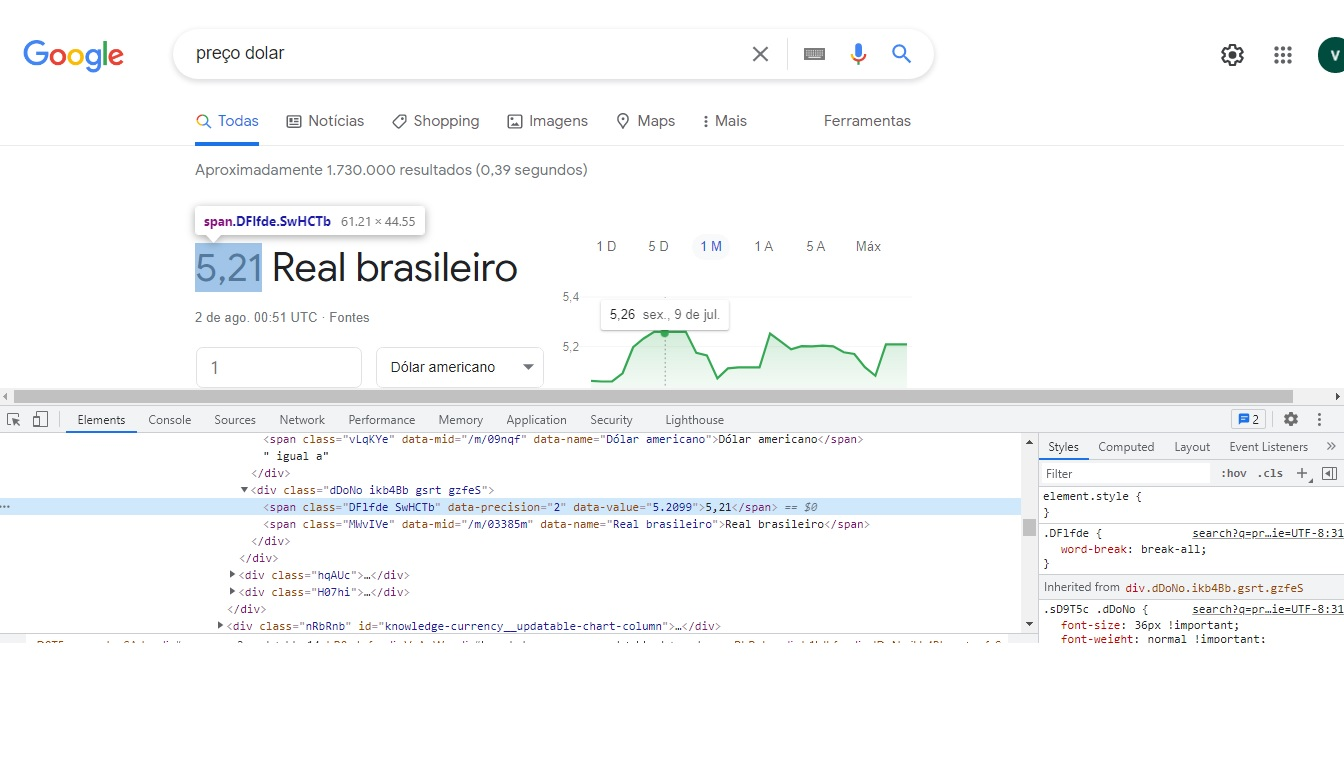